In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
df = pd.read_csv("../data/cleaned/final_engineered_MITV.csv")


In [3]:
X = df.drop(columns=['traffic_volume', 'date_time'])
y = df['traffic_volume']


In [4]:
X.shape

(43831, 69)

In [5]:
y.shape

(43831,)

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# TRAINING SET

In [7]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)
# TEST AND CROSS VALIDATION SET 

In [11]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

model = LinearRegression()
model.fit(X_train, y_train_log)

val_pred_log = model.predict(X_val)
val_pred = np.expm1(val_pred_log)  # Inverse transform

rmse_val = mean_squared_error(y_val, val_pred)
r2_val = r2_score(y_val, val_pred)

print("Log-Scaled Validation RMSE:", rmse_val)
print("Log-Scaled Validation R²:", r2_val)


Log-Scaled Validation RMSE: 3664466.1078748163
Log-Scaled Validation R²: 0.07663131798249834


In [12]:
ridge = Ridge(alpha=10.0)  # You can tune alpha: 0.1, 1, 10, 100
ridge.fit(X_train, y_train)

val_pred = ridge.predict(X_val)
rmse_ridge = np.sqrt(mean_squared_error(y_val, val_pred))
r2_ridge = r2_score(y_val, val_pred)

print("Ridge RMSE:", rmse_ridge)
print("Ridge R²:", r2_ridge)

Ridge RMSE: 1576.5761485329087
Ridge R²: 0.3736828049029203


In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)  # You can tune alpha: 0.001, 0.01, 1
lasso.fit(X_train, y_train)

val_pred = lasso.predict(X_val)
rmse_lasso = np.sqrt(mean_squared_error(y_val, val_pred))
r2_lasso = r2_score(y_val, val_pred)

print("Lasso RMSE:", rmse_lasso)
print("Lasso R²:", r2_lasso)


Lasso RMSE: 1577.2045016919215
Lasso R²: 0.37318346103818556


In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

val_pred = xgb.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
r2 = r2_score(y_val, val_pred)

print("XGBoost RMSE:", rmse)
print("XGBoost R²:", r2)


XGBoost RMSE: 383.2105736406552
XGBoost R²: 0.962996780872345


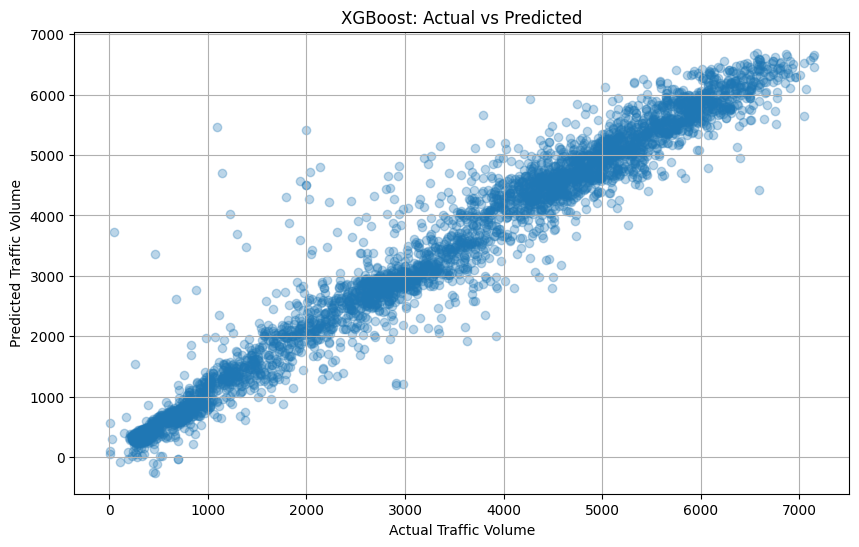

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_val, val_pred, alpha=0.3)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.show()


In [17]:
test_pred = xgb.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
r2_test = r2_score(y_test, test_pred)

print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)


Test RMSE: 376.2330353318273
Test R²: 0.9640746712684631


In [18]:
import joblib
joblib.dump(xgb, "../src/xgboost_model.pkl")


['../src/xgboost_model.pkl']

In [19]:
import os

# 📁 Make directory if it doesn't exist
os.makedirs("../data/splits", exist_ok=True)

# 🧠 Save train/val/test splits
X_train.to_csv("../data/splits/X_train.csv", index=False)
y_train.to_csv("../data/splits/y_train.csv", index=False)

X_val.to_csv("../data/splits/X_val.csv", index=False)
y_val.to_csv("../data/splits/y_val.csv", index=False)

X_test.to_csv("../data/splits/X_test.csv", index=False)
y_test.to_csv("../data/splits/y_test.csv", index=False)


In [20]:
import joblib

joblib.dump(X_train.columns.tolist(), "../models/feature_columns.pkl")


['../models/feature_columns.pkl']